<a href="https://colab.research.google.com/github/Kowsar-Hossain/AI_Final_Assignment/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
import zipfile
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#unzip the dataset
zip_path = '/content/binaryclassifier.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/binaryclassifier')

#setting folder paths
shirt_path = '/content/binaryclassifier/ResizedShirt'
tshirt_path = '/content/binaryclassifier/ResizedTShirt'

#image size
img_height, img_width = 255, 255

#load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = load_img(img_path, target_size=(img_height, img_width))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)
        except:
            print(f"Could not load image: {img_path}")
    return images, labels

#load images
shirt_images, shirt_labels = load_images_from_folder(shirt_path, 0)   # Shirt -> 0
tshirt_images, tshirt_labels = load_images_from_folder(tshirt_path, 1) # TShirt -> 1

#combine data
X = np.array(shirt_images + tshirt_images, dtype='float32')
Y = np.array(shirt_labels + tshirt_labels).reshape(-1, 1)

#normalize images
X /= 255.0

#shuffle and split into train/test
X, Y = shuffle(X, Y, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (769, 255, 255, 3)
Y_train shape: (769, 1)
X_test shape: (193, 255, 255, 3)
Y_test shape: (193, 1)


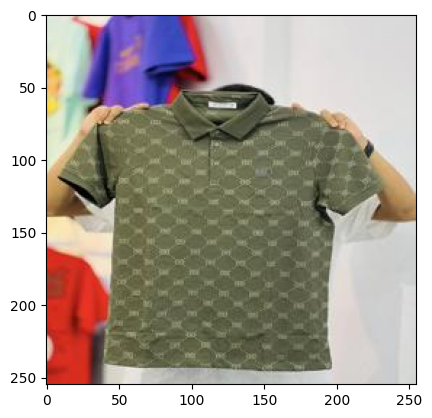

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(255, 255, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, Y_test)
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.5699 - loss: 2.5360 - val_accuracy: 0.7047 - val_loss: 0.5661
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - accuracy: 0.7535 - loss: 0.4859 - val_accuracy: 0.7876 - val_loss: 0.4462
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.8796 - loss: 0.3077 - val_accuracy: 0.8549 - val_loss: 0.3249
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.9501 - loss: 0.2144 - val_accuracy: 0.8446 - val_loss: 0.3757
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.9374 - loss: 0.1497 - val_accuracy: 0.8705 - val_loss: 0.2756
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.9735 - loss: 0.1015 - val_accuracy: 0.8290 - val_loss: 0.3688
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.9733 - loss: 0.0777 - val_accuracy: 0.8756 - val_loss: 0.2928
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.9853 - loss: 0.0560 - val_accuracy: 0.8860 - val_loss:

In [ ]:
#evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test Loss     : {loss:.4f}")
print(f"Test Accuracy : {accuracy*100:.2f}%")


Test Loss     : 0.2144
Test Accuracy : 92.23%


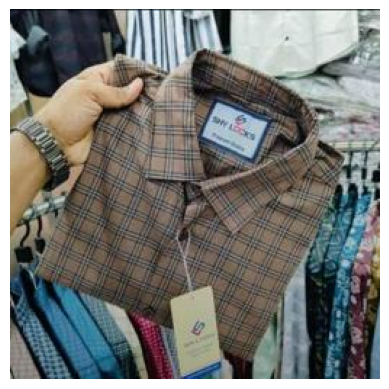

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Our model says it is a: shirt
Actual label: shirt


In [ ]:
idx2 = random.randint(0, len(Y_test)-1)

#show the image
plt.imshow(X_test[idx2])
plt.axis('off')
plt.show()

#predict
y_pred = model.predict(X_test[idx2].reshape(1, 255, 255, 3))
y_pred = y_pred > 0.5

# Map prediction to class
if y_pred[0][0] == 0:
    pred = 'shirt'
else:
    pred = 'tshirt'

print("Our model says it is a:", pred)
print("Actual label:", 'shirt' if Y_test[idx2]==0 else 'tshirt')

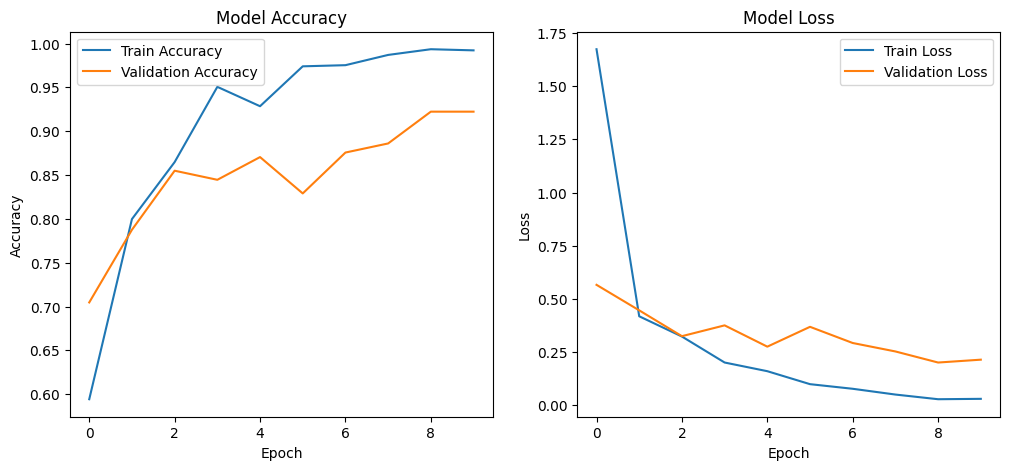

In [ ]:
import matplotlib.pyplot as plt

#plot accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


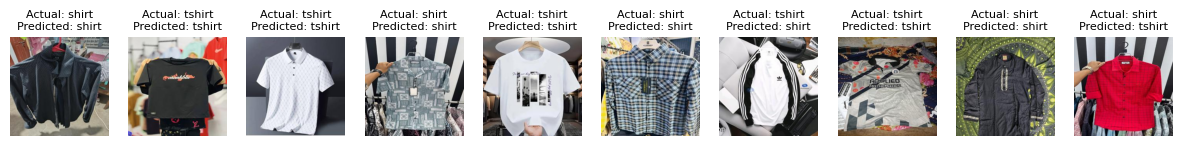

In [ ]:
import matplotlib.pyplot as plt, random

plt.figure(figsize=(15,3))

for i in range(10):
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx]
    actual = 'shirt' if Y_test[idx]==0 else 'tshirt'  # adjust according to your labels

    # predict
    y_pred = model.predict(img.reshape(1, 255, 255, 3))
    predicted = 'shirt' if y_pred[0][0] < 0.5 else 'tshirt'

    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.title(f"Actual: {actual}\nPredicted: {predicted}", fontsize=8)
    plt.axis('off')

plt.show()


In [ ]:
#epochs which epochs it is good?